# Time Series Analysis In R
This notebook summarizes the following:
* Loading CSV data into R
* Converting the data inta a TimeSeries object
* Summarizing the data set
* Plotting graphs for various features in the dataset
* Visual Analysis of the data set
* Identifying Trends
* Identifying seasonality
* Identifying periodicity
* Predicting values for the dataset

### Dataset
The data set used here is obtained from Govt of India Website, data.gov.in, and contains the average monthly temperature in India for all years between 1901 and 2016.

In [17]:
# The 'zoo' library in R is used to load data for the time series from a CSV file
library(zoo)

### Study of Temperature Variation in India
The dataset for average monthly temperature in India, starting from 1901 to 2016 is available for download from the Govt of India website [data.gov.in](https://data.gov.in/node/3973241/download).
Save the file to the same location as this notebook, and set the name to `mean_temp_1901_2016.csv`

In [18]:
# Load the data using the 'zoo' library. The dataset has a header row, which can be used to identify the columns
z <- read.zoo(file='mean_temp_1901_2016.csv', header = TRUE, sep = ",")

In [19]:
# Display the dataset overall structure
head(z)

       JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
1901 17.99 19.43 23.49 26.41 28.28 28.60 27.49 26.98 26.26 25.08 21.73 18.95
1902 19.00 20.39 24.10 26.54 28.68 28.44 27.29 27.05 25.95 24.37 21.33 18.78
1903 18.32 19.79 22.46 26.03 27.93 28.41 28.04 26.63 26.34 24.57 20.96 18.29
1904 17.77 19.39 22.95 26.73 27.83 27.85 26.84 26.73 25.84 24.36 21.07 18.84
1905 17.40 17.79 21.78 24.84 28.32 28.69 27.67 27.47 26.29 26.16 22.07 18.71
1906 17.50 19.14 22.21 26.53 29.06 28.02 27.46 26.82 26.23 24.75 21.93 19.55
     ANNUAL JAN.FEB MAR.MAY JUN.SEP OCT.DEC
1901  24.23   18.71   26.06   27.30   21.92
1902  24.33   19.70   26.44   27.18   21.49
1903  23.80   19.05   25.47   27.17   21.27
1904  23.86   18.66   25.84   26.83   21.42
1905  23.71   17.58   24.99   27.37   21.48
1906  24.12   18.37   25.93   27.15   22.08

In [20]:
# Summarize the dataset, and find the consistency
cat("The number of observations in the dataset is: ", length(z[,1]))
cat("\n\nColumn names of the dataset: ", colnames(z))
cat("\n\nSummary of the dataset: \n")
summary(z)

The number of observations in the dataset is:  116

Column names of the dataset:  JAN FEB MAR APR MAY JUN JUL AUG SEP OCT NOV DEC ANNUAL JAN.FEB MAR.MAY JUN.SEP OCT.DEC

Summary of the dataset: 


     Index           JAN             FEB             MAR             APR       
 Min.   :1901   Min.   :17.25   Min.   :17.79   Min.   :21.78   Min.   :24.84  
 1st Qu.:1930   1st Qu.:18.07   1st Qu.:19.47   1st Qu.:22.83   1st Qu.:25.99  
 Median :1958   Median :18.34   Median :19.98   Median :23.32   Median :26.54  
 Mean   :1958   Mean   :18.40   Mean   :20.11   Mean   :23.42   Mean   :26.49  
 3rd Qu.:1987   3rd Qu.:18.72   3rd Qu.:20.54   3rd Qu.:23.91   3rd Qu.:26.90  
 Max.   :2016   Max.   :20.92   Max.   :23.58   Max.   :26.61   Max.   :29.56  
      MAY             JUN             JUL             AUG       
 Min.   :26.97   Min.   :27.33   Min.   :26.48   Min.   :26.21  
 1st Qu.:27.95   1st Qu.:28.02   1st Qu.:27.15   1st Qu.:26.73  
 Median :28.34   Median :28.25   Median :27.34   Median :26.89  
 Mean   :28.37   Mean   :28.29   Mean   :27.36   Mean   :26.93  
 3rd Qu.:28.75   3rd Qu.:28.57   3rd Qu.:27.52   3rd Qu.:27.14  
 Max.   :30.78   Max.   :29.88   Max.   :28.47   M

In [21]:
# Convert the dataset into a timeseries
time_series = ts(data=z, freq=1)

# Check the type of time_series object. It has multiple type properties
class(time_series)

# Show first few rows of the time series
head(time_series)

[1] "mts"    "ts"     "matrix"

JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN.FEB,MAR.MAY,JUN.SEP,OCT.DEC
17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,24.23,18.71,26.06,27.30,21.92
19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,24.33,19.70,26.44,27.18,21.49
18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,23.80,19.05,25.47,27.17,21.27
17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,23.86,18.66,25.84,26.83,21.42
17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,23.71,17.58,24.99,27.37,21.48
17.50,19.14,22.21,26.53,29.06,28.02,27.46,26.82,26.23,24.75,21.93,19.55,24.12,18.37,25.93,27.15,22.08


## Visualization
To get an approximate picture of how the temperature has varied in the last century, plot a line graph of each month

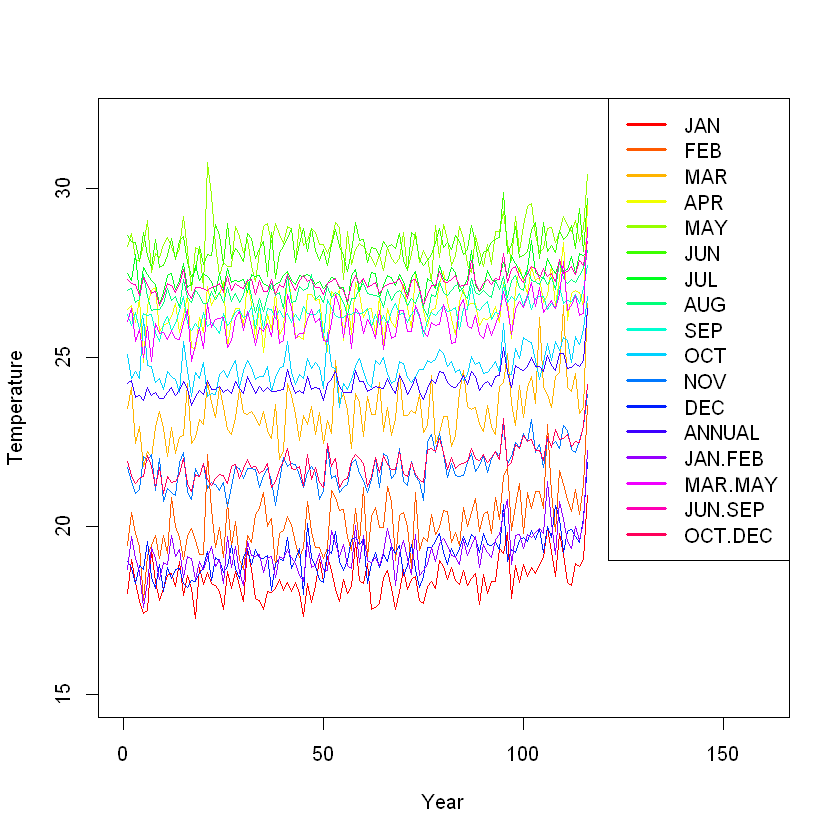

In [22]:
# Get colors to assign to each individual column
colors <- rainbow(ncol(time_series))

# Plot the initial graph, to set the Axes labels, and the scales
plot(c(0, 160), c(15, 32), xlab='Year', ylab='Temperature', type='n')
for ( k in 1:ncol(time_series)) {
    lines(time_series[, k], col=colors[k])
    legend("topright", colnames(time_series), col = colors, lwd=c(2.5,2.5), lty=c(1,1))
}

# A few insights:
# On average, January is the coldest month of the year. 
# May is the hottest

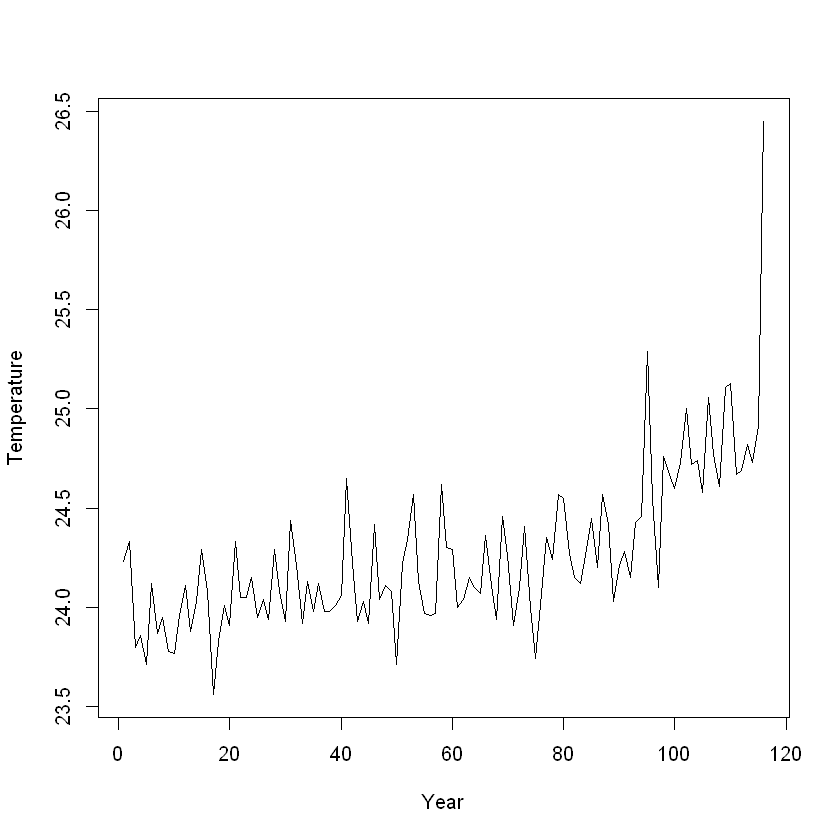

In [23]:
# Too much going on in that picture! Plot only the annual temperatures
annual <- time_series[, "ANNUAL"]
plot(annual, xlab='Year', ylab='Temperature', type='l')

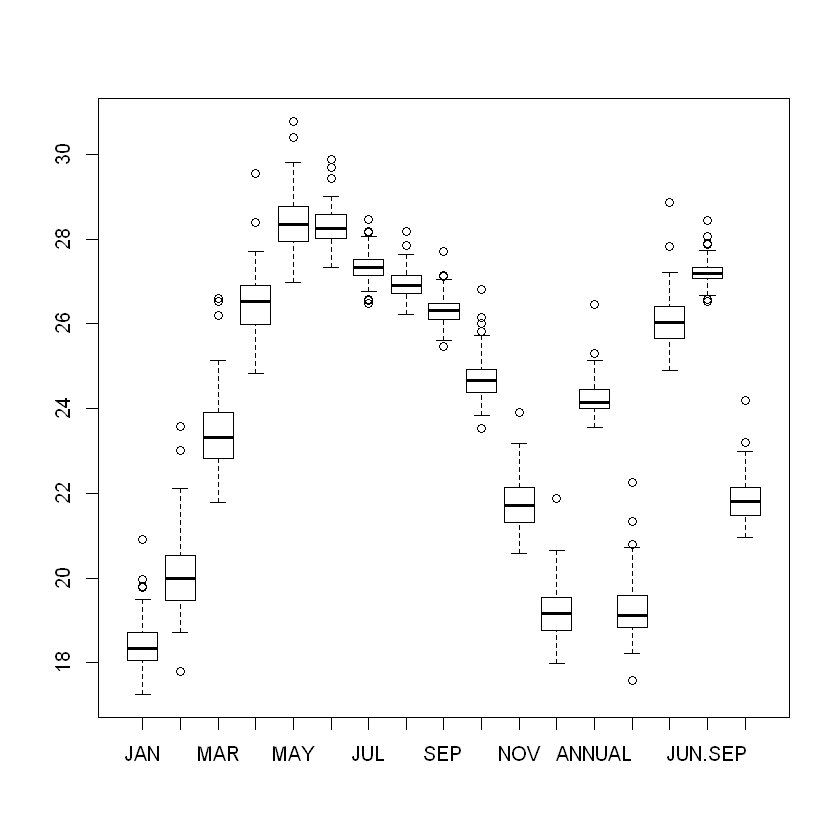

In [24]:
# Another option is to plot a boxplot of the data
boxplot(time_series)

# For some months, the average temperature has varied a lot - for e.g. March
# For a few months, the variation is minimal for e.g. July, August, September

## Identifying A Trend

A good way to find a trend is to apply a Smoothing Average or a Moving Average

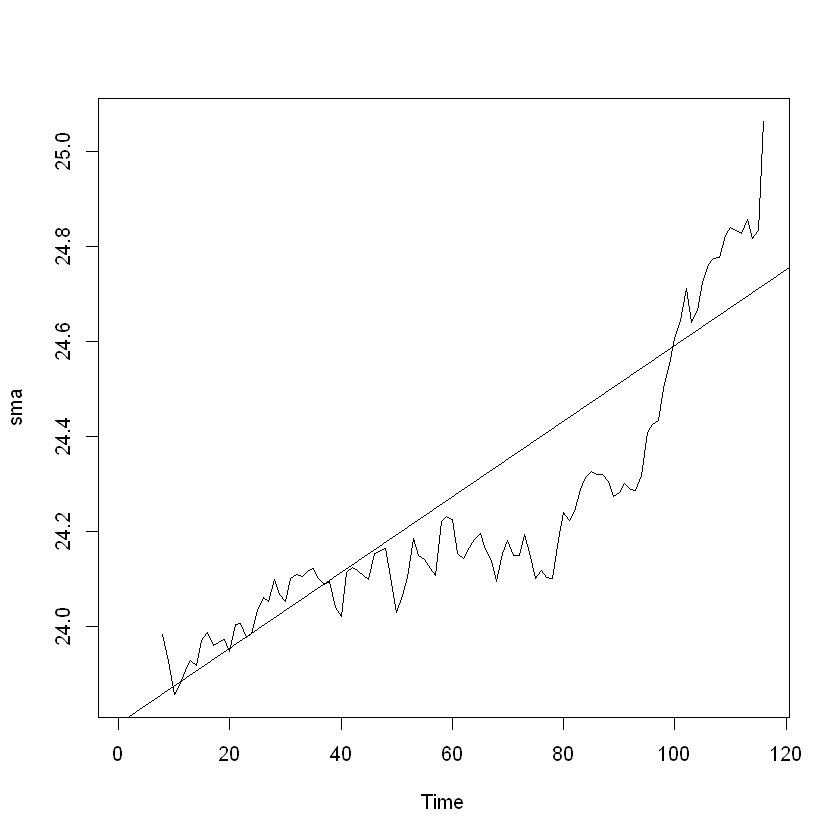

In [25]:
library('TTR')

sma <- SMA(annual,n=8)

plot.ts(sma)
abline(reg=lm(annual~time(annual)))

# The graph seems to indicate that there is an upward trend to the average annual temperature!

The type of the series is ' additive '


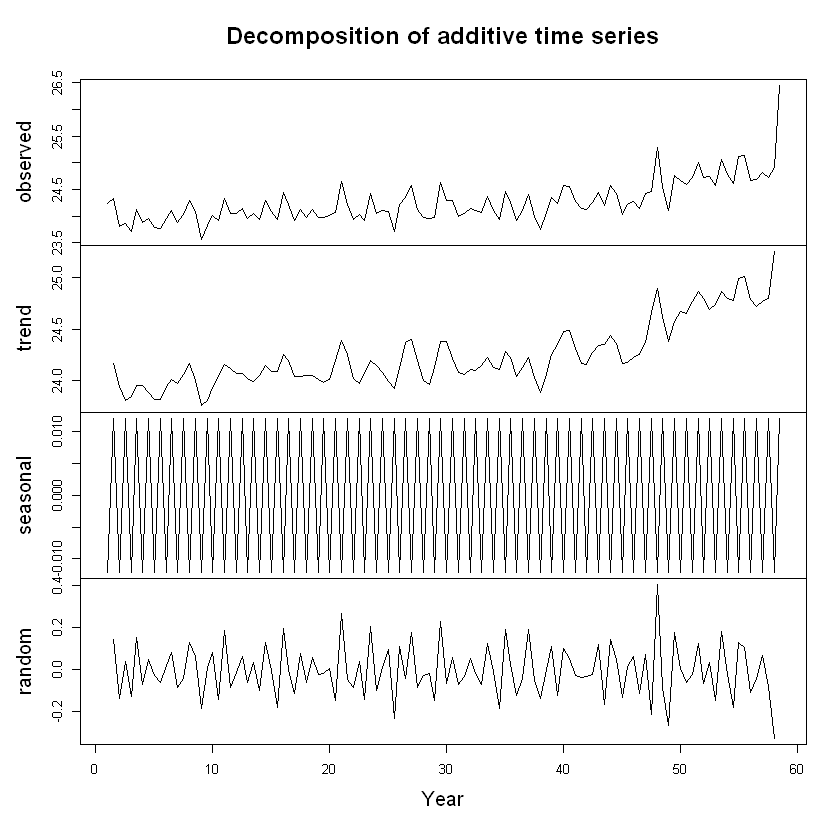

In [26]:
# To identify a trend, first try to decompose the data into individual components
annual_decomposed <- decompose(ts(annual, freq=2))

# Print the type of the time series, additive or multiplicative
cat("The type of the series is '", annual_decomposed$type, "'\n")

# Plot the seasonal data, the trend, and the noise
plot(annual_decomposed, xlab='Year', ylab='Temperature', type='l')

# From the graphs, it is clear that there is no seasonality - it is almost very close to zero
# There is also significant noise / randomness in the series

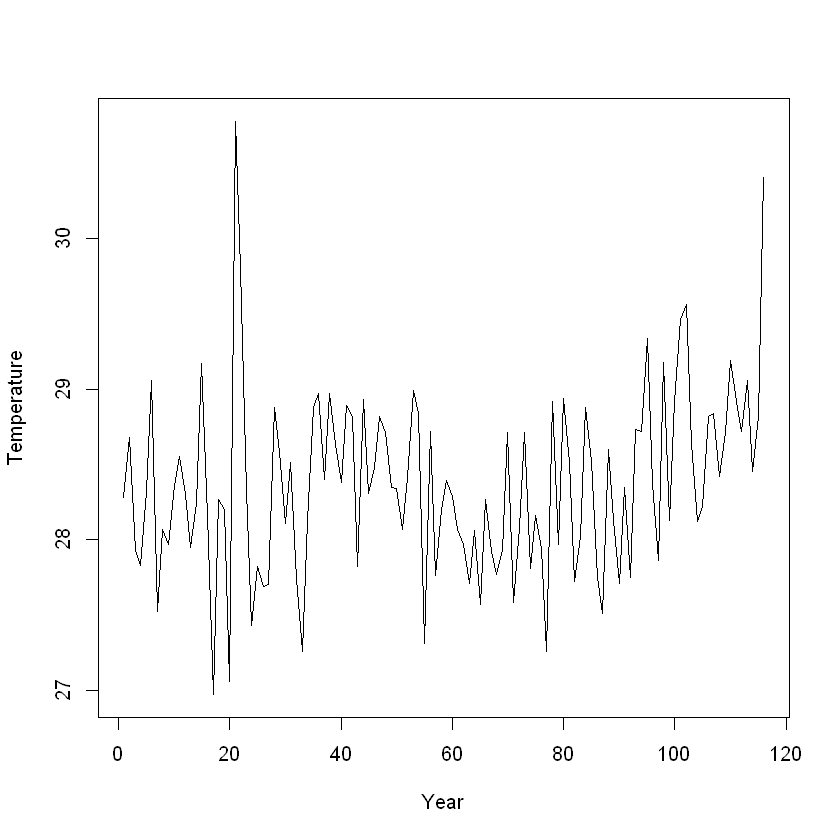

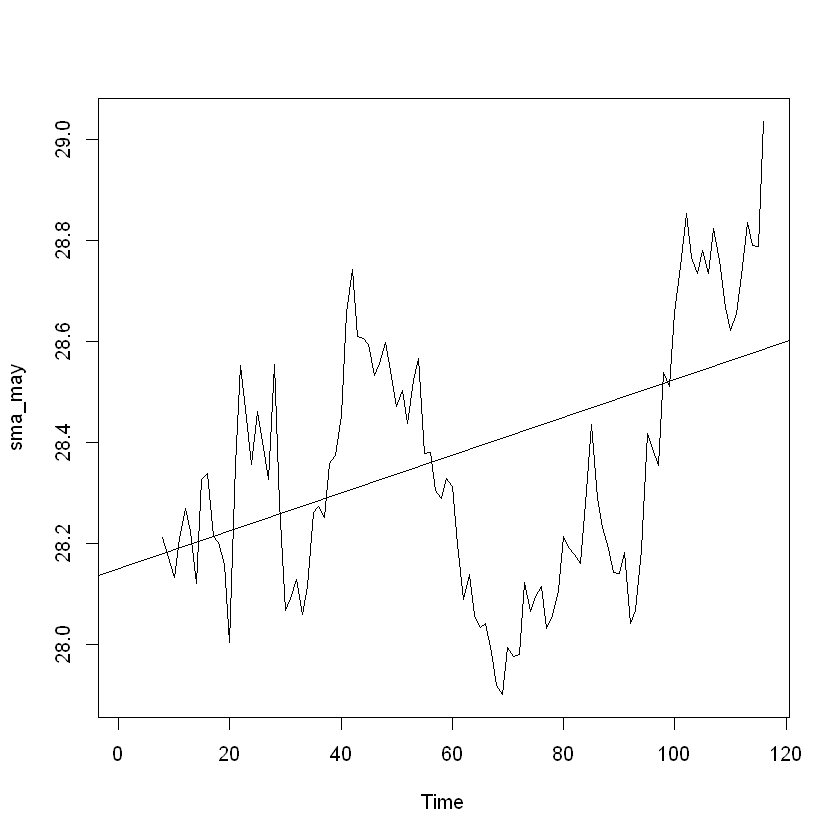

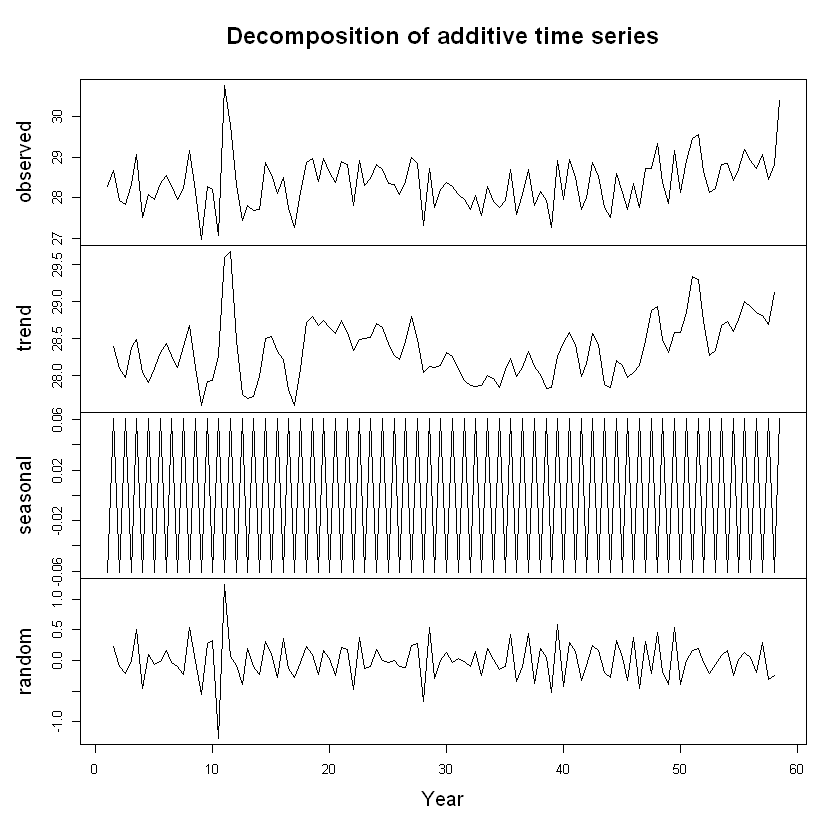

In [27]:
# Repeat the same for the month of May, to observe the hottest month of the year
may <- time_series[, "MAY"]
plot(may, xlab='Year', ylab='Temperature', type='l')

library('TTR')
sma_may <- SMA(may,n=8)

plot.ts(sma_may)
abline(reg=lm(may~time(may)))

# To identify a trend, first try to decompose the data into individual components
may_decomposed <- decompose(ts(may, freq=2))

# Plot the seasonal data, the trend, and the noise
plot(may_decomposed, xlab='Year', ylab='Temperature', type='l')

# There is no seasonality, as before.
# The trend is significantly less than that of the annual temperature

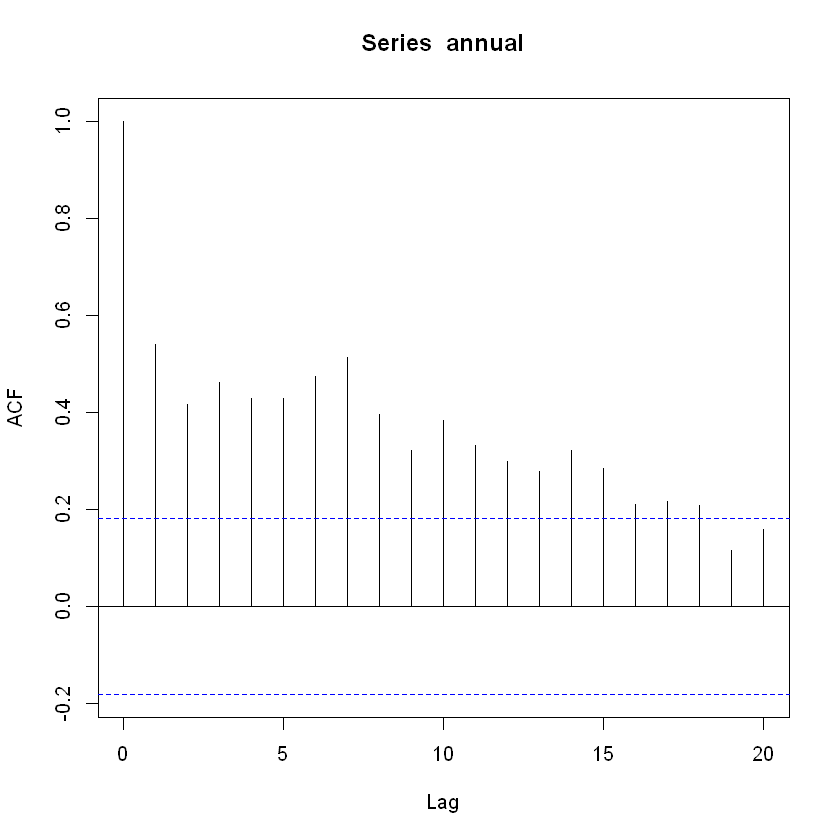

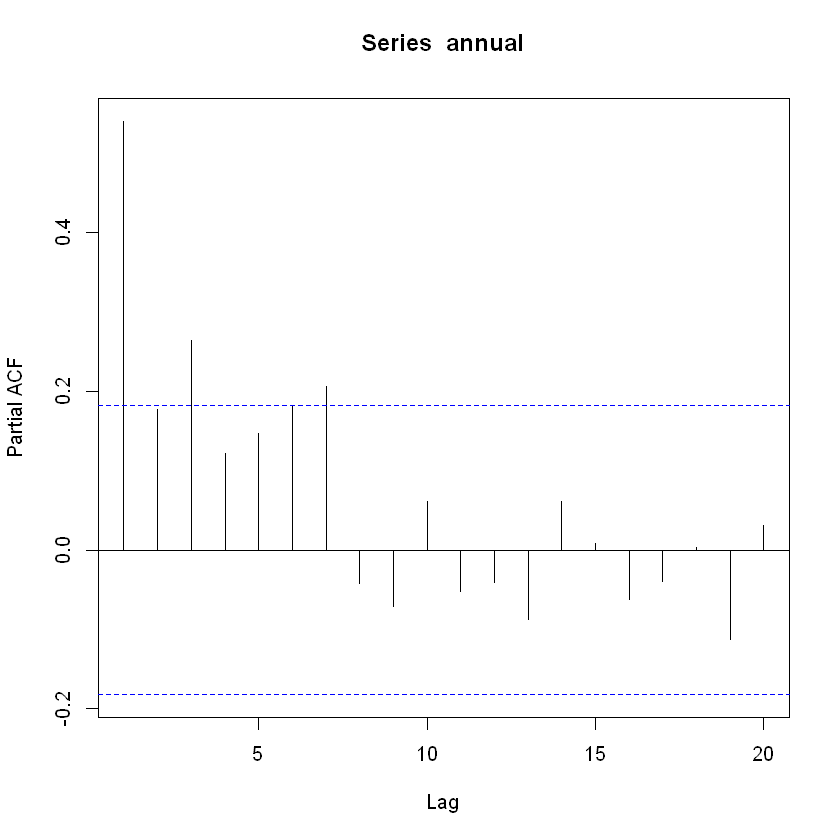

In [28]:
# Next, try to plot the auto-correlation functions

# both acf() and pacf() generates plots by default

acfRes <- acf(annual) # autocorrelation
pacfRes <- pacf(annual)  # partial autocorrelation
# The plots once again show lack of periodicity - i.e. that the observations are more or less acyclic

### Testing for stationarity
Test for stationary time series is done through Augmented Dickey-Fuller test.
The ADF outputs a p-value which indicates the likelihood that the null hypothesis is correct.

I.e. The Null Hypothesis is always assumed to be that the data is not stationary.
The alternative hypothesis is that the data is stationary.

In [29]:
# If running for the first time, uncomment the line below
install.packages('tseries')
library(tseries)

adf.test(diff(annual), alternative="stationary", k=1)
# The resultant p-value, 0.01, indicates strongly that the data are stationary

also installing the dependency 'quadprog'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'quadprog' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prash\AppData\Local\Temp\RtmpI9FWAZ\downloaded_packages


Warning message in adf.test(diff(annual), alternative = "stationary", k = 1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(annual)
Dickey-Fuller = -11.402, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


## Forecasting

Knowing about the stationarity of the data, the next step is to predict the values for future years.
The prediction is done using the ARIMA model

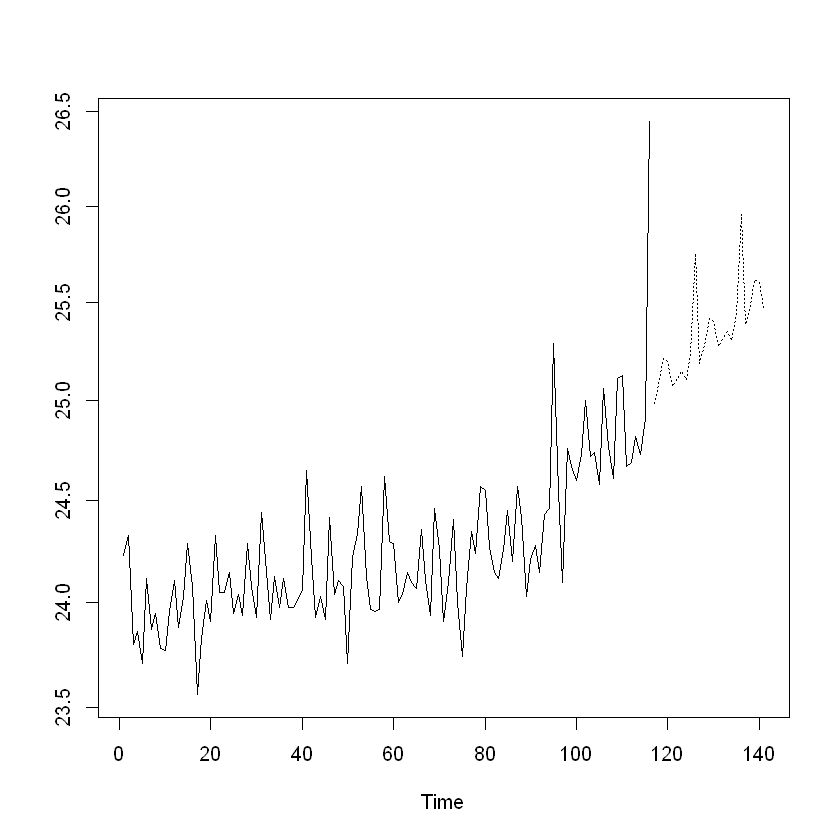

In [30]:
# Fit the Arima model to the Annual average temperature data, with a preiod of 10 years
fit <- arima(log(annual), c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 10))

# Predict the temperature using the model fit, for the next 25 years
pred <- predict(fit, n.ahead = 25)

# Plot the original series, and the prediction
ts.plot(annual,2.718^pred$pred, log = "y", lty = c(1,3))

# The prediction indicates how the temperatures may vary over the next 25 years, in a dotted line

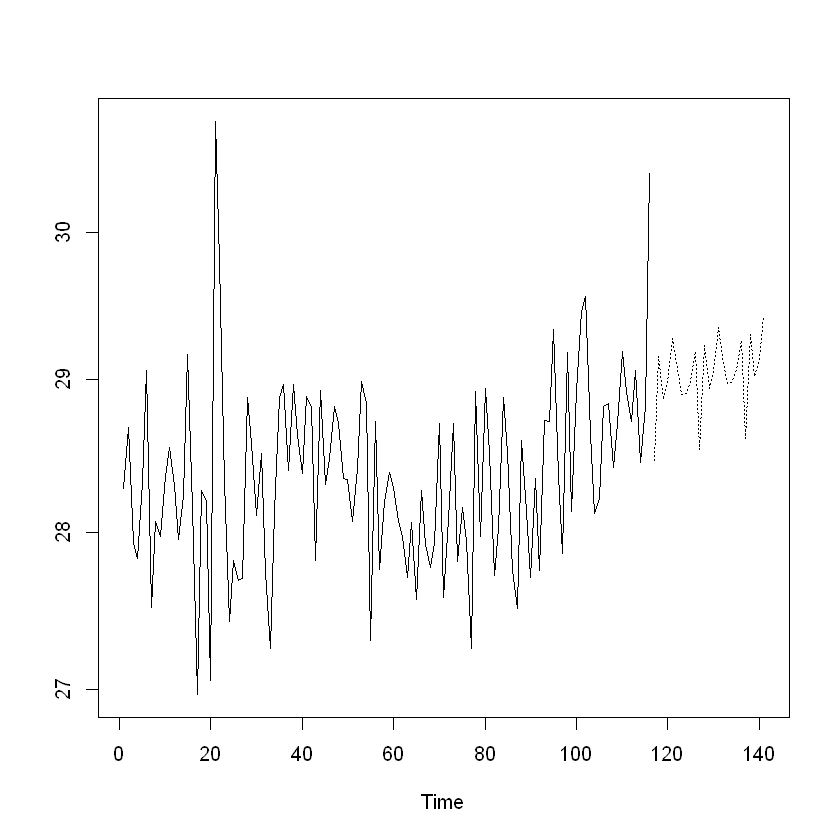

In [31]:
# Repeat for the month of MAY

# Fit the Arima model to the Annual average temperature data, with a preiod of 10 years
fit <- arima(log(may), c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 10))

# Predict the temperature using the model fit, for the next 25 years
pred <- predict(fit, n.ahead = 25)

# Plot the original series, and the prediction
ts.plot(may,2.718^pred$pred, log = "y", lty = c(1,3))

# The prediction indicates how the temperatures may vary over the next 25 years, in a dotted line

## Conclusion

In this notebook, the time series analysis done on the average annual temperature.

There appears to be an upward trend in the observed annual temperatures

No periodicity was detected in the data